In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
#данные о пассажирах титаника

In [6]:
df = pd.read_excel('/Users/korol787/Desktop/Универ/6 семестр/Машинка/Данные/titanic.xlsx')

In [7]:
df.head()

,Выжил,Класс_билета,Пол,Родственники,Семья,Плата,Порт,Год_рождения
0,0,3,male,1,0,45839.0000,S,1890.0
1,1,1,female,1,0,71.2833,C,1874.0
2,1,3,female,0,0,7.9250,S,1886.0
3,1,1,female,1,0,53.1000,S,1877.0
4,0,3,male,0,0,44689.0000,S,1877.0


<BarContainer object of 2 artists>

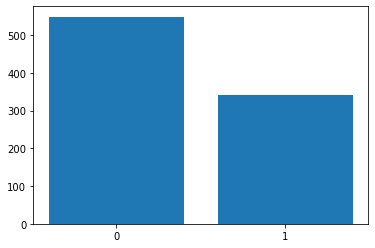

In [27]:
plt.bar(['0', '1'], df['Выжил'].value_counts().values)

Тут barchart нам может показать насколько сбалансирована выборка, ведь эта целевая переменная для прогнозирования, но тут классы довольно сбалансированны и с ними можно ничего не делать

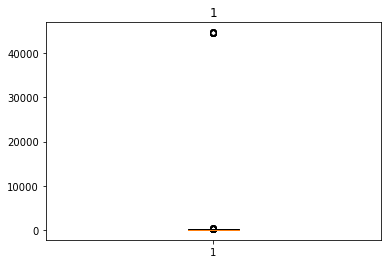

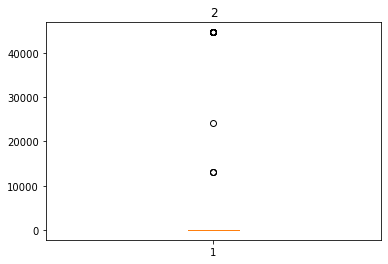

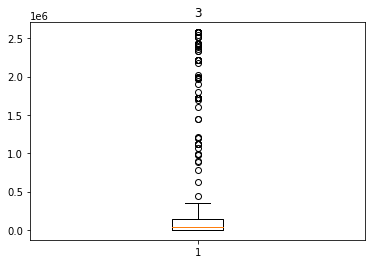

In [33]:
for cl in sorted(df['Класс_билета'].unique()):
    plt.boxplot(df[df['Класс_билета'] == cl]['Плата'])
    plt.title(cl)
    plt.show()

In [60]:
df2 = df[((df['Класс_билета'] == 1) & (df['Плата'] <= 10000))\
| ((df['Класс_билета'] == 2) & (df['Плата'] <= 10000))\
| ((df['Класс_билета'] == 3) & (df['Плата'] <= 500_000))]

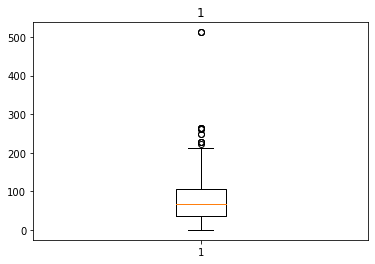

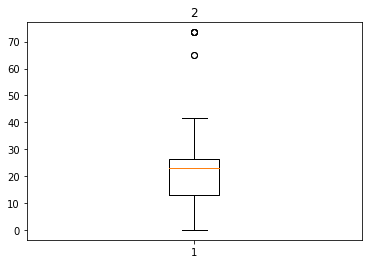

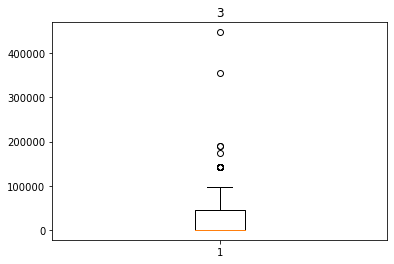

In [61]:
for cl in sorted(df2['Класс_билета'].unique()):
    plt.boxplot(df2[df2['Класс_билета'] == cl]['Плата'])
    plt.title(cl)
    plt.show()

Тут boxplot может нам показать какие есть выбросы и различные распределения в плате за каюту в зависимости от класса билета.

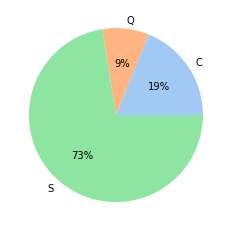

In [87]:
#define data
data = df.pivot_table(index='Порт', values='Выжил', aggfunc='count')['Выжил'].values
labels = df.pivot_table(index='Порт', values='Выжил', aggfunc='count').index

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[ 0:5 ]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

Круговая диаграмма здесь нам хорошо покажет структуру пассажиров в разрезе портов, где они зашли на корабль